In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Common imports
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
from tensorflow import set_random_seed

from keras import backend as K
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

Using TensorFlow backend.


In [3]:
# 查看可用的 GPU 
print(K.tensorflow_backend._get_available_gpus())

['/job:localhost/replica:0/task:0/device:GPU:0']


In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [5]:
# Raw Data loading
# 資料路徑
DATASET_PATH  = '/home/cslab/Documents/NASA/'

data_dir = '2nd_test/'

In [8]:
# Root mean square

merged_data_rms = pd.DataFrame()
for filename in os.listdir(DATASET_PATH + data_dir):
    dataset = pd.read_csv(os.path.join(DATASET_PATH+data_dir, filename), sep='\t', header=None)
#     print(filename)
    dataset_rms = np.array(np.sqrt(np.mean(np.power(dataset, 2))))
#     print(dataset_rms)
#     dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_rms = pd.DataFrame(dataset_rms.reshape(1,4))
    dataset_rms.index = [filename]
    merged_data_rms = merged_data_rms.append(dataset_rms)
    
merged_data_rms.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']
merged_data_rms.index = pd.to_datetime(merged_data_rms.index, format='%Y.%m.%d.%H.%M.%S')
merged_data_rms = merged_data_rms.sort_index()

In [8]:
merged_data_rms.to_csv('merged_dataset_rms_BearingTest_2.csv')

In [7]:
merged_data_rms.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.074179,0.090944,0.109404,0.054103
2004-02-12 10:42:39,0.075382,0.093419,0.109817,0.056101
2004-02-12 10:52:39,0.076230,0.093718,0.109861,0.056145
2004-02-12 11:02:39,0.078724,0.092947,0.110667,0.056807
2004-02-12 11:12:39,0.078474,0.095348,0.107506,0.056841


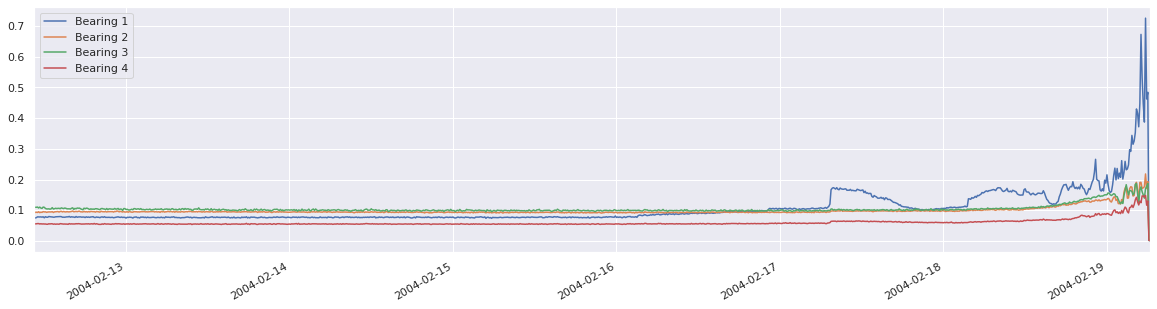

In [9]:
merged_data_rms.plot(figsize = (20,5))

In [10]:
# Skewness Value(偏度)
from scipy.stats import skew

merged_data_ske = pd.DataFrame()
for filename in os.listdir(DATASET_PATH + data_dir):
    dataset = pd.read_csv(os.path.join(DATASET_PATH+data_dir, filename), sep='\t', header=None)
#     print(filename)
    dataset_ske = np.array(skew(dataset))
#     print(dataset_rms)
#     dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_ske = pd.DataFrame(dataset_ske.reshape(1,4))
    dataset_ske.index = [filename]
    merged_data_ske = merged_data_ske.append(dataset_ske)
    
merged_data_ske.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']
merged_data_ske.index = pd.to_datetime(merged_data_ske.index, format='%Y.%m.%d.%H.%M.%S')
merged_data_ske = merged_data_ske.sort_index()

In [12]:
merged_data_ske.to_csv('merged_dataset_ske_BearingTest_2.csv')

In [11]:
merged_data_ske.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.083993,0.126915,0.204840,-0.022080
2004-02-12 10:42:39,0.052142,0.070088,-0.023854,0.001582
2004-02-12 10:52:39,0.032808,0.096583,0.056561,0.070449
2004-02-12 11:02:39,0.041486,0.105834,0.033550,-0.036327
2004-02-12 11:12:39,0.028224,0.097966,-0.002892,0.019008


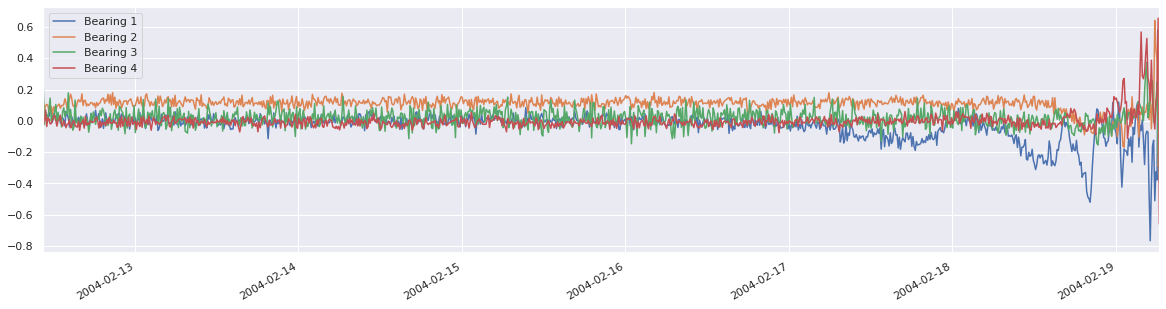

In [13]:
merged_data_ske.plot(figsize = (20,5))

In [14]:
# Kurtosis Value(峰度)
from scipy.stats import kurtosis

merged_data_kur = pd.DataFrame()
for filename in os.listdir(DATASET_PATH + data_dir):
    dataset = pd.read_csv(os.path.join(DATASET_PATH+data_dir, filename), sep='\t', header=None)
#     print(filename)
    dataset_kur = np.array(kurtosis(dataset))
#     print(dataset_rms)
#     dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_kur = pd.DataFrame(dataset_kur.reshape(1,4))
    dataset_kur.index = [filename]
    merged_data_kur = merged_data_kur.append(dataset_kur)
    
merged_data_kur.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']
merged_data_kur.index = pd.to_datetime(merged_data_kur.index, format='%Y.%m.%d.%H.%M.%S')
merged_data_kur = merged_data_kur.sort_index()

In [15]:
merged_data_kur.to_csv('merged_dataset_kur_BearingTest_2.csv')

In [16]:
merged_data_kur.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.628763,0.506801,3.213075,0.065959
2004-02-12 10:42:39,0.648291,0.253014,1.395250,0.107539
2004-02-12 10:52:39,0.513475,0.310789,2.639948,0.257236
2004-02-12 11:02:39,1.157953,0.235341,2.682779,0.806190
2004-02-12 11:12:39,0.603177,0.226309,1.578395,0.138954


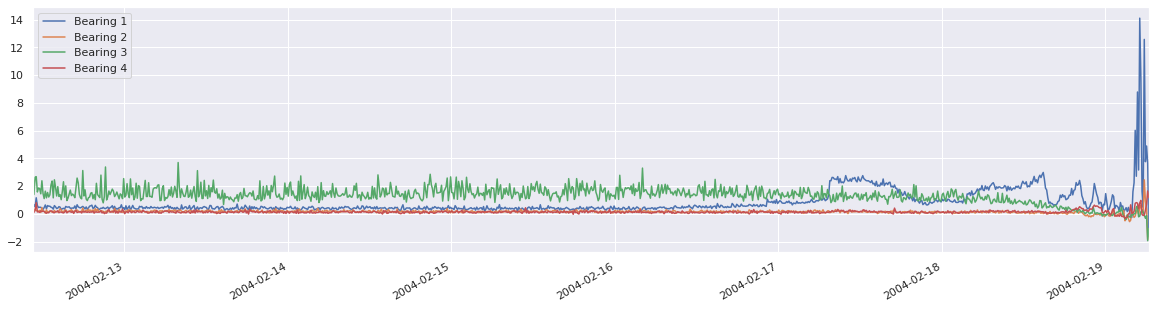

In [17]:
merged_data_kur.plot(figsize = (20,5))

In [18]:
merged_data = pd.DataFrame()
for filename in os.listdir(DATASET_PATH + data_dir):
#     print(filename)
    dataset = pd.read_csv(os.path.join(DATASET_PATH+data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)
    
merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()

In [19]:
merged_data.to_csv('merged_dataset_BearingTest_2.csv')

In [20]:
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


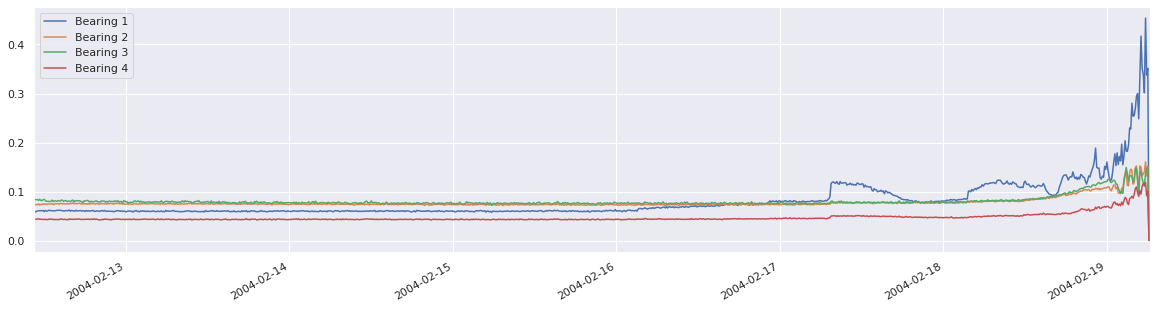

In [21]:
merged_data.plot(figsize = (20,5))